In [2]:
import pandas as pd
import numpy as np

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Data Load

In [2]:
x = np.load('./x_(7799,10,4069).npy')
y = np.load('./y_(7799,1).npy')

i = round(x.shape[0]*0.8)
X_train, y_train = x[:i,:,:], y[:i]
X_test, y_test = x[i:,:,:], y[i:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6239, 10, 4069), (6239,), (1560, 10, 4069), (1560,))

# X : (7799, 10, 4069) - LSTM

## LSTM 1 (dropout)

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *

lstm = Sequential()
lstm.add(InputLayer(input_shape=(X_train.shape[1],X_train.shape[2])))
lstm.add(LSTM(units=128, activation='sigmoid', return_sequences=True))
lstm.add(LSTM(units=64, activation='sigmoid', return_sequences=True))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=64, activation='sigmoid', return_sequences=True))
lstm.add(LSTM(units=32, activation='sigmoid', return_sequences=False))
lstm.add(Dropout(0.2))
lstm.add(Dense(units=1))
# lstm.summary()

### ep = 100, pa = 20 (5회)

In [88]:
import sklearn.metrics 
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_acc', patience=20, verbose=1, restore_best_weights=True)
lstm.compile(optimizer= "adam", loss = "binary_crossentropy", metrics=['acc'])
history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=100,  callbacks=[early_stop], shuffle=False)

preds = lstm.predict(X_test)

preds[preds>0.5]=1
preds[preds<=0.5]=0

from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, preds))

Epoch 1/100
37/37 [==============================] - 6s 71ms/step - loss: 1.2304 - acc: 0.5646 - val_loss: 0.7056 - val_acc: 0.4974
Epoch 2/100
37/37 [==============================] - 2s 46ms/step - loss: 0.7969 - acc: 0.5783 - val_loss: 0.7050 - val_acc: 0.4974
Epoch 3/100
37/37 [==============================] - 2s 46ms/step - loss: 0.7309 - acc: 0.5951 - val_loss: 0.7217 - val_acc: 0.4974
Epoch 4/100
37/37 [==============================] - 2s 46ms/step - loss: 0.7345 - acc: 0.5910 - val_loss: 0.7253 - val_acc: 0.4974
Epoch 5/100
37/37 [==============================] - 3s 75ms/step - loss: 0.7190 - acc: 0.5813 - val_loss: 0.6907 - val_acc: 0.4974
Epoch 6/100
37/37 [==============================] - 2s 47ms/step - loss: 0.6927 - acc: 0.5900 - val_loss: 0.6881 - val_acc: 0.4974
Epoch 7/100
37/37 [==============================] - 2s 46ms/step - loss: 0.6892 - acc: 0.5959 - val_loss: 0.7254 - val_acc: 0.4974
Epoch 8/100
37/37 [==============================] - 2s 46ms/step - loss: 0.

### ep = 500, pa = 30, 50, 80, 150
- patience = 30 : 73.8 / 72.5 / 72.8
- patience = 50 : 71.5 / 72.5
- patience = 80 : 72.5 / 73.5
- patience = 150 : 71.5 / 70.8

In [4]:
## import sklearn.metrics 
from keras.callbacks import EarlyStopping

# -------- 수정할 부분 ---------
ep = 500
pa = 30
# -----------------------------

early_stop = EarlyStopping(monitor='val_acc', patience=pa, verbose=1, restore_best_weights=True)
lstm.compile(optimizer= "adam", loss = "binary_crossentropy", metrics=['acc'])
history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=ep,  callbacks=[early_stop], shuffle=False)

preds = lstm.predict(X_test)

preds[preds>0.5]=1
preds[preds<=0.5]=0

from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, preds))

Epoch 1/500
37/37 [==============================] - 26s 102ms/step - loss: 1.2454 - acc: 0.5525 - val_loss: 0.7167 - val_acc: 0.5026
Epoch 2/500
37/37 [==============================] - 2s 47ms/step - loss: 0.9853 - acc: 0.5113 - val_loss: 0.7154 - val_acc: 0.4974
Epoch 3/500
37/37 [==============================] - 2s 47ms/step - loss: 0.7612 - acc: 0.5620 - val_loss: 0.7210 - val_acc: 0.4974
Epoch 4/500
37/37 [==============================] - 2s 46ms/step - loss: 0.7234 - acc: 0.6043 - val_loss: 0.7294 - val_acc: 0.4974
Epoch 5/500
37/37 [==============================] - 2s 45ms/step - loss: 0.6801 - acc: 0.6181 - val_loss: 0.7330 - val_acc: 0.4974
Epoch 6/500
37/37 [==============================] - 2s 46ms/step - loss: 0.6945 - acc: 0.6220 - val_loss: 0.7307 - val_acc: 0.4974
Epoch 7/500
37/37 [==============================] - 2s 46ms/step - loss: 0.6880 - acc: 0.6159 - val_loss: 0.7248 - val_acc: 0.4974
Epoch 8/500
37/37 [==============================] - 2s 46ms/step - loss: 

### acc, loss 그래프

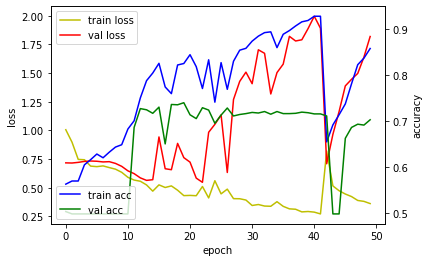

In [5]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

_=loss_ax.plot(history.history['loss'], 'y', label='train loss')
_=loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

_=acc_ax.plot(history.history['acc'], 'b', label='train acc')
_=acc_ax.plot(history.history['val_acc'], 'g', label='val acc')

_=loss_ax.set_xlabel('epoch')
_=loss_ax.set_ylabel('loss')
_=acc_ax.set_ylabel('accuracy')

_=loss_ax.legend(loc='upper left')
_=acc_ax.legend(loc='lower left')

plt.show()

## LSTM 2

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *

lstm2 = Sequential()
lstm2.add(InputLayer(input_shape=(X_train.shape[1],X_train.shape[2])))
lstm2.add(LSTM(units=512, activation='tanh', return_sequences=True))
lstm2.add(LSTM(units=256, activation='tanh', return_sequences=True))
lstm2.add(LSTM(units=128, activation='tanh', return_sequences=True))
lstm2.add(LSTM(units=64, activation='sigmoid', return_sequences=True))
lstm2.add(LSTM(units=32, activation='sigmoid', return_sequences=False))
lstm2.add(Dense(units=1))
# lstm2.summary()

### ep = 100, pa = 20 (5회)

In [24]:
import sklearn.metrics 
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_acc', patience=20, verbose=1, restore_best_weights=True)
lstm2.compile(optimizer= "adam", loss = "binary_crossentropy", metrics=['acc'])
history = lstm2.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=100,  callbacks=[early_stop], shuffle=False)

preds = lstm2.predict(X_test)

preds[preds>0.5]=1
preds[preds<=0.5]=0

from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, preds))

Epoch 1/100
37/37 [==============================] - 12s 215ms/step - loss: 10.6881 - acc: 0.3071 - val_loss: 7.6729 - val_acc: 0.5026
Epoch 2/100
37/37 [==============================] - 7s 188ms/step - loss: 10.6881 - acc: 0.3071 - val_loss: 7.6729 - val_acc: 0.5026
Epoch 3/100
37/37 [==============================] - 7s 188ms/step - loss: 10.6881 - acc: 0.3071 - val_loss: 7.6729 - val_acc: 0.5026
Epoch 4/100
37/37 [==============================] - 7s 188ms/step - loss: 10.6881 - acc: 0.3071 - val_loss: 7.6729 - val_acc: 0.5026
Epoch 5/100
37/37 [==============================] - 7s 189ms/step - loss: 10.6881 - acc: 0.3071 - val_loss: 7.6729 - val_acc: 0.5026
Epoch 6/100
37/37 [==============================] - 7s 187ms/step - loss: 10.6881 - acc: 0.3071 - val_loss: 7.6729 - val_acc: 0.5026
Epoch 7/100
37/37 [==============================] - 7s 186ms/step - loss: 10.6881 - acc: 0.3071 - val_loss: 7.6729 - val_acc: 0.5026
Epoch 8/100
37/37 [==============================] - 7s 186ms

### ep = 500, pa = 30, 50, 80, 150
- patience = 30 : 50.6
- patience = 50 : 50.6 
- patience = 80 : 50.6
- patience = 150 : 50.6

In [16]:
import sklearn.metrics 
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_acc', patience=80, verbose=1, restore_best_weights=True)
lstm2.compile(optimizer= "adam", loss = "binary_crossentropy", metrics=['acc'])
history = lstm2.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=500,  callbacks=[early_stop], shuffle=False)

preds = lstm2.predict(X_test)

preds[preds>0.5]=1
preds[preds<=0.5]=0

from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, preds))

Epoch 1/500
37/37 [==============================] - 12s 215ms/step - loss: 10.6881 - acc: 0.3071 - val_loss: 7.6729 - val_acc: 0.5026
Epoch 2/500
37/37 [==============================] - 7s 188ms/step - loss: 10.6881 - acc: 0.3071 - val_loss: 7.6729 - val_acc: 0.5026
Epoch 3/500
37/37 [==============================] - 7s 188ms/step - loss: 10.6881 - acc: 0.3071 - val_loss: 7.6729 - val_acc: 0.5026
Epoch 4/500
37/37 [==============================] - 7s 189ms/step - loss: 10.6881 - acc: 0.3071 - val_loss: 7.6729 - val_acc: 0.5026
Epoch 5/500
37/37 [==============================] - 7s 188ms/step - loss: 10.6881 - acc: 0.3071 - val_loss: 7.6729 - val_acc: 0.5026
Epoch 6/500
37/37 [==============================] - 7s 188ms/step - loss: 10.6881 - acc: 0.3071 - val_loss: 7.6729 - val_acc: 0.5026
Epoch 7/500
37/37 [==============================] - 7s 189ms/step - loss: 10.6881 - acc: 0.3071 - val_loss: 7.6729 - val_acc: 0.5026
Epoch 8/500
37/37 [==============================] - 7s 188ms

Epoch 62/500
37/37 [==============================] - 7s 187ms/step - loss: 10.6881 - acc: 0.3071 - val_loss: 7.6729 - val_acc: 0.5026
Epoch 63/500
37/37 [==============================] - 7s 187ms/step - loss: 10.6881 - acc: 0.3071 - val_loss: 7.6729 - val_acc: 0.5026
Epoch 64/500
37/37 [==============================] - 7s 187ms/step - loss: 10.6881 - acc: 0.3071 - val_loss: 7.6729 - val_acc: 0.5026
Epoch 65/500
37/37 [==============================] - 7s 187ms/step - loss: 10.6881 - acc: 0.3071 - val_loss: 7.6729 - val_acc: 0.5026
Epoch 66/500
37/37 [==============================] - 7s 188ms/step - loss: 10.6881 - acc: 0.3071 - val_loss: 7.6729 - val_acc: 0.5026
Epoch 67/500
37/37 [==============================] - 7s 187ms/step - loss: 10.6881 - acc: 0.3071 - val_loss: 7.6729 - val_acc: 0.5026
Epoch 68/500
37/37 [==============================] - 7s 188ms/step - loss: 10.6881 - acc: 0.3071 - val_loss: 7.6729 - val_acc: 0.5026
Epoch 69/500
37/37 [==============================] - 7

### acc, loss 그래프

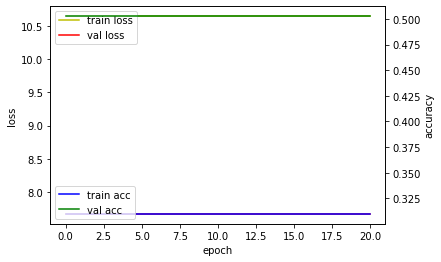

In [25]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

_=loss_ax.plot(history.history['loss'], 'y', label='train loss')
_=loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

_=acc_ax.plot(history.history['acc'], 'b', label='train acc')
_=acc_ax.plot(history.history['val_acc'], 'g', label='val acc')

_=loss_ax.set_xlabel('epoch')
_=loss_ax.set_ylabel('loss')
_=acc_ax.set_ylabel('accuracy')

_=loss_ax.legend(loc='upper left')
_=acc_ax.legend(loc='lower left')

plt.show()

### history 함수 직접 정의
- 기본적인 모델의 학습 상태 모니터링은 앞서 소개한 히스토리 콜백함수나 텐서보드를 이용하면 되지만, 순환신경망 모델인 경우에는 fit 함수를 여러번 호출되기 때문에 제대로 학습상태를 볼 수가 없습니다. 
- https://tykimos.github.io/2017/07/09/Training_Monitoring/

In [26]:
import keras

# 사용자 정의 히스토리 클래스 정의
class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []        
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
    
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
import numpy as np
from keras.callbacks import EarlyStopping

np.random.seed(3)

lstm2 = Sequential()
lstm2.add(InputLayer(input_shape=(X_train.shape[1],X_train.shape[2])))
lstm2.add(LSTM(units=512, activation='tanh', return_sequences=True))
lstm2.add(LSTM(units=256, activation='tanh', return_sequences=True))
lstm2.add(LSTM(units=128, activation='tanh', return_sequences=True))
lstm2.add(LSTM(units=64, activation='sigmoid', return_sequences=True))
lstm2.add(LSTM(units=32, activation='sigmoid', return_sequences=False))
lstm2.add(Dense(units=1))

custom_hist = CustomHistory()
custom_hist.init()

lstm2.compile(optimizer= "adam", loss = "binary_crossentropy", metrics=['acc'])
early_stop = EarlyStopping(monitor='val_acc', patience=20, verbose=1, restore_best_weights=True)

for epoch_idx in range(100):
    print ('epochs : ' + str(epoch_idx) )
    lstm2.fit(X_train, y_train, epochs=1, batch_size=128, validation_split=0.25, callbacks=[custom_hist, early_stop])
    
preds = lstm2.predict(X_test)

preds[preds>0.5]=1
preds[preds<=0.5]=0

from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, preds))

epochs : 0
37/37 [==============================] - 13s 212ms/step - loss: 10.7468 - acc: 0.3033 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 1
37/37 [==============================] - 7s 185ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 2
37/37 [==============================] - 7s 188ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 3
37/37 [==============================] - 7s 187ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 4
37/37 [==============================] - 7s 188ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 5
37/37 [==============================] - 7s 190ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 6
37/37 [==============================] - 7s 187ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 7
37/37 [==============================] - 7s 187ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 8
37/37 [==============================] - 7s 189ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 9
37/37 [==============================] - 7s 185ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 10
37/37 [==============================] - 7s 187ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 11
37/37 [==============================] - 7s 187ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 12
37/37 [==============================] - 7s 186ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 13
37/37 [==============================] - 7s 188ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 14
37/37 [==============================] - 7s 187ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 15
37/37 [==============================] - 7s 189ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 16
37/37 [==============================] - 7s 186ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 17
37/37 [==============================] - 7s 189ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 18
37/37 [==============================] - 7s 189ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 19
37/37 [==============================] - 7s 186ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 20
37/37 [==============================] - 7s 187ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 21
37/37 [==============================] - 7s 188ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 22
37/37 [==============================] - 7s 186ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 23
37/37 [==============================] - 7s 188ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 24
37/37 [==============================] - 7s 188ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 25
37/37 [==============================] - 7s 186ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 26
37/37 [==============================] - 7s 188ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 27
37/37 [==============================] - 7s 188ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 28
37/37 [==============================] - 7s 187ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 29
37/37 [==============================] - 7s 188ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 30
37/37 [==============================] - 7s 187ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 31
37/37 [==============================] - 7s 187ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 32
37/37 [==============================] - 7s 187ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 33
37/37 [==============================] - 7s 188ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 34
37/37 [==============================] - 7s 186ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 35
37/37 [==============================] - 7s 188ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 36
37/37 [==============================] - 7s 188ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 37
37/37 [==============================] - 7s 187ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 38
37/37 [==============================] - 7s 188ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 39
37/37 [==============================] - 7s 187ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 40
37/37 [==============================] - 7s 187ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 41
37/37 [==============================] - 7s 188ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 42
37/37 [==============================] - 7s 188ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 43
37/37 [==============================] - 7s 186ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 44
37/37 [==============================] - 7s 188ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 45
37/37 [==============================] - 7s 188ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 46
37/37 [==============================] - 7s 186ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 47
37/37 [==============================] - 7s 188ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 48
37/37 [==============================] - 7s 187ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 49
37/37 [==============================] - 7s 186ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 50
37/37 [==============================] - 7s 187ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 51
37/37 [==============================] - 7s 188ms/step - loss: 10.6448 - acc: 0.3099 - val_loss: 7.6729 - val_acc: 0.5026


epochs : 52
37/37 [==============================] - ETA: 0s - loss: 10.6448 - acc: 0.3099

KeyboardInterrupt: 

### acc, loss 그래프

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

Text(0, 0.5, 'accuray')

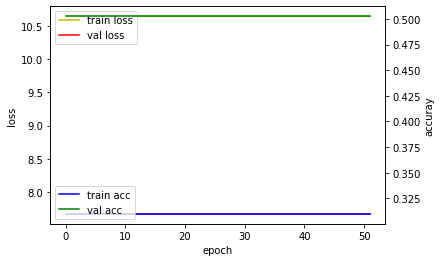

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(custom_hist.train_loss, 'y', label='train loss')
loss_ax.plot(custom_hist.val_loss, 'r', label='val loss')

acc_ax.plot(custom_hist.train_acc, 'b', label='train acc')
acc_ax.plot(custom_hist.val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

## LSTM 1 + L2 reg
### ep = 500, pa = 30, 50, 80, 150
- patience = 30 : 72.0
- patience = 50 : 72.8
- patience = 80 : 72.7
- patience = 150 : 72.9

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
import sklearn.metrics 
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

lstm = Sequential()
lstm.add(InputLayer(input_shape=(X_train.shape[1],X_train.shape[2])))
lstm.add(LSTM(units=128, activation='sigmoid', return_sequences=True))
lstm.add(LSTM(units=64, activation='sigmoid', return_sequences=True))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=64, activation='sigmoid', return_sequences=True))
lstm.add(LSTM(units=32, activation='sigmoid', return_sequences=False))
lstm.add(Dropout(0.2))
lstm.add(Dense(units=1, kernel_regularizer='l2'))
# lstm.summary()


# -------- 수정할 부분 ---------
ep = 500
pa = 150
# -----------------------------

early_stop = EarlyStopping(monitor='val_acc', patience=pa, verbose=1, restore_best_weights=True)
lstm.compile(optimizer= "adam", loss = "binary_crossentropy", metrics=['acc'])
history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=ep,  callbacks=[early_stop], shuffle=False)

preds = lstm.predict(X_test)

preds[preds>0.5]=1
preds[preds<=0.5]=0

from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, preds))

Epoch 1/500
37/37 [==============================] - 6s 70ms/step - loss: 1.1633 - acc: 0.5281 - val_loss: 0.7413 - val_acc: 0.4974
Epoch 2/500
37/37 [==============================] - 2s 45ms/step - loss: 1.0239 - acc: 0.5086 - val_loss: 0.7494 - val_acc: 0.4974
Epoch 3/500
37/37 [==============================] - 2s 62ms/step - loss: 0.8858 - acc: 0.6095 - val_loss: 0.7584 - val_acc: 0.4974
Epoch 4/500
37/37 [==============================] - 2s 54ms/step - loss: 0.8724 - acc: 0.5880 - val_loss: 0.8794 - val_acc: 0.5026
Epoch 5/500
37/37 [==============================] - 2s 64ms/step - loss: 2.2296 - acc: 0.3291 - val_loss: 0.8263 - val_acc: 0.5026
Epoch 6/500
37/37 [==============================] - 2s 64ms/step - loss: 1.4269 - acc: 0.3544 - val_loss: 0.7385 - val_acc: 0.5026
Epoch 7/500
37/37 [==============================] - 2s 63ms/step - loss: 1.0356 - acc: 0.4098 - val_loss: 0.7231 - val_acc: 0.5026
Epoch 8/500
37/37 [==============================] - 2s 65ms/step - loss: 0.

37/37 [==============================] - 2s 45ms/step - loss: 0.3856 - acc: 0.8448 - val_loss: 0.6947 - val_acc: 0.7006
Epoch 124/500
37/37 [==============================] - 2s 45ms/step - loss: 0.3706 - acc: 0.8907 - val_loss: 0.7500 - val_acc: 0.7045
Epoch 125/500
37/37 [==============================] - 2s 45ms/step - loss: 0.3618 - acc: 0.8924 - val_loss: 1.2722 - val_acc: 0.7051
Epoch 126/500
37/37 [==============================] - 2s 45ms/step - loss: 0.3676 - acc: 0.8985 - val_loss: 1.6938 - val_acc: 0.7038
Epoch 127/500
37/37 [==============================] - 2s 45ms/step - loss: 0.3570 - acc: 0.9149 - val_loss: 1.7162 - val_acc: 0.7032
Epoch 128/500
37/37 [==============================] - 2s 45ms/step - loss: 0.3329 - acc: 0.9225 - val_loss: 0.9606 - val_acc: 0.7032
Epoch 129/500
37/37 [==============================] - 2s 45ms/step - loss: 0.3725 - acc: 0.9316 - val_loss: 1.8498 - val_acc: 0.7019
Epoch 130/500
37/37 [==============================] - 2s 46ms/step - loss: 

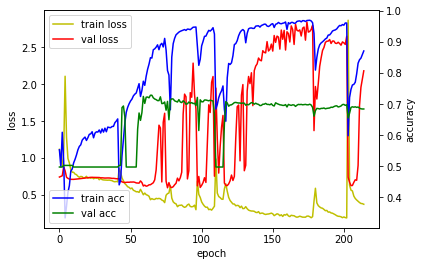

In [18]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

_=loss_ax.plot(history.history['loss'], 'y', label='train loss')
_=loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

_=acc_ax.plot(history.history['acc'], 'b', label='train acc')
_=acc_ax.plot(history.history['val_acc'], 'g', label='val acc')

_=loss_ax.set_xlabel('epoch')
_=loss_ax.set_ylabel('loss')
_=acc_ax.set_ylabel('accuracy')

_=loss_ax.legend(loc='upper left')
_=acc_ax.legend(loc='lower left')

plt.show()

# 비시계열 model

### X : (7799, 4069)

In [90]:
x = np.load('./x_(7799,10,4069).npy')
y = np.load('./y_(7799,1).npy')

# x를 2차원으로 축소 
x1 = x.sum(axis=1)

# 2이상인 값 -> 1로 변경 
x1[x1>1]=1

i = round(x1.shape[0]*0.8)
X_train, y_train = x1[:i,:], y[:i]
X_test, y_test = x1[i:,:], y[i:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6239, 4069), (1560, 4069), (6239,), (1560,))

In [93]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Support vector machine
model = SVC()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Support vector machine:", accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test))

# Gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Gaussian naive bayes:", accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test))

# K nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("K nearest neighbor:", accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test))

# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Random forest:", accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test))

# Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Gradient boosing:", accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test))

# Neural network
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=1000)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Neural network:", accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test))

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

clf = AdaBoostClassifier(n_estimators=500, 
                        random_state=10, 
                        learning_rate=0.1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('AdaBoost 정확도: {:.4f}'.format(accuracy_score(y_test, pred)))

SVC()

Support vector machine: 0.905433563071005 0.7467948717948718


GaussianNB()

Gaussian naive bayes: 0.5377464337233531 0.5474358974358975


KNeighborsClassifier()

K nearest neighbor: 0.7523641609232249 0.5666666666666667


RandomForestClassifier()

Random forest: 0.9980766148421222 0.7051282051282052


GradientBoostingClassifier()

Gradient boosing: 0.7901907356948229 0.7121794871794872


MLPClassifier(max_iter=1000)

Neural network: 0.9980766148421222 0.7121794871794872


AdaBoostClassifier(learning_rate=0.1, n_estimators=500, random_state=10)

AdaBoost 정확도: 0.7244


### X : (7727, 4069)

In [96]:
x = np.load('./x_(7727,4069).npy')
y = np.load('./y_(7727,1).npy')

x1 = x
# 2이상인 값 -> 1로 변경 
x1[x1>1]=1

i = round(x1.shape[0]*0.8)
X_train, y_train = x1[:i,:], y[:i]
X_test, y_test = x1[i:,:], y[i:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6182, 4069), (1545, 4069), (6182,), (1545,))

In [97]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Support vector machine
model = SVC()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Support vector machine:", accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test))

# Gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Gaussian naive bayes:", accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test))

# K nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("K nearest neighbor:", accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test))

# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Random forest:", accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test))

# Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Gradient boosing:", accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test))

# Neural network
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=1000)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Neural network:", accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test))

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

clf = AdaBoostClassifier(n_estimators=500, 
                        random_state=10, 
                        learning_rate=0.1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('AdaBoost 정확도: {:.4f}'.format(accuracy_score(y_test, pred)))

SVC()

Support vector machine: 0.9060174700744096 0.7398058252427184


GaussianNB()

Gaussian naive bayes: 0.5402782271109673 0.5495145631067961


KNeighborsClassifier()

K nearest neighbor: 0.749595600129408 0.565695792880259


RandomForestClassifier()

Random forest: 1.0 0.7132686084142394


GradientBoostingClassifier()

Gradient boosing: 0.7979618246522161 0.7216828478964401


MLPClassifier(max_iter=1000)

Neural network: 1.0 0.7145631067961165


AdaBoostClassifier(learning_rate=0.1, n_estimators=500, random_state=10)

AdaBoost 정확도: 0.7256


# X splitting method

## X : (7799, 10, 4069) -> (7727, 10, 4069)

In [120]:
x = np.load('./x_(7799,10,4069).npy')
y = np.load('./y_(7799,1).npy')

sub_sum = x.sum(axis=1).sum(axis=1)
sub_sum[sub_sum>1] = 1
sub_sum = pd.DataFrame(sub_sum)
sub_sum = sub_sum.reset_index()
sub_sum.columns = ['subid','value']
sub_sum

,subid,value
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
...,...,...
7794,7794,1.0
7795,7795,1.0
7796,7796,1.0
7797,7797,1.0


In [121]:
zero_index = sub_sum[sub_sum['value']==0].index
zero_index

Int64Index([  13,  125,  345,  631,  655,  746,  850,  901, 1003, 1063, 1110,
            1265, 1453, 1608, 1672, 1713, 1756, 2060, 2122, 2365, 2443, 2475,
            2587, 2603, 2740, 2787, 2853, 3226, 3308, 3464, 3570, 3637, 3687,
            3756, 3793, 3915, 4044, 4093, 4260, 4405, 4503, 4533, 4614, 4689,
            4899, 4961, 5140, 5169, 5235, 5338, 5373, 5473, 5558, 5630, 5722,
            5886, 6006, 6014, 6036, 6046, 6318, 6385, 6519, 6761, 6781, 6923,
            7288, 7388, 7515, 7527, 7593, 7755],
           dtype='int64')

In [123]:
y_df = pd.DataFrame(y).reset_index()
y_df.loc[zero_index][0].value_counts()

1    57
0    15
Name: 0, dtype: int64

In [124]:
# 2이상인 sum을 1로 안바꿨을때 (subid별 itemid의 합을 온전히 보기 위함)
x = np.load('./x_(7799,10,4069).npy')
y = np.load('./y_(7799,1).npy')

sub_sum = x.sum(axis=1).sum(axis=1)
sub_sum = pd.DataFrame(sub_sum)
sub_sum = sub_sum.reset_index()
sub_sum.columns = ['subid','sum']

sub_sum['sum'].mean()
sub_sum['sum'].max()
sub_sum['sum'].min()

261.9210155148096

875.0

0.0

In [152]:
sub_sum

,subid,sum
0,0,161.0
1,1,341.0
2,2,273.0
3,3,370.0
4,4,180.0
...,...,...
7794,7794,370.0
7795,7795,173.0
7796,7796,233.0
7797,7797,205.0


<AxesSubplot:ylabel='Count'>

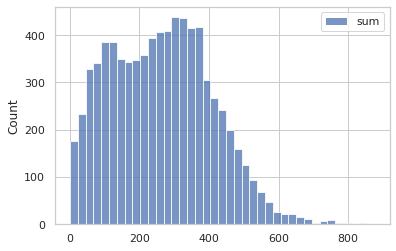

In [155]:
# 2이상인 sum을 1로 안바꿨을때 (subid별 itemid의 합을 온전히 보기 위함)
sub_sum = pd.DataFrame(sub_sum['sum'])
import seaborn as sns
sns.histplot(data=sub_sum)

In [68]:
real_index = set(range(7799))-set(zero_index)
real_index = list(real_index)
real_index = np.array(real_index)
real_index.shape

(7727,)

In [78]:
x = np.load('./x_(7799,10,4069).npy')
y = np.load('./y_(7799,1).npy')

real_x = x[real_index,:,:]
real_x.shape

real_y = y[real_index]
real_y.shape

np.save('x_(7727,10,4069)', real_x)
np.save('y_(7727,1)',real_y)

real_x_2d = real_x.sum(axis=1
real_x_2d.shape

np.save('x_(7727,4069)', real_x_2d)

(7727, 10, 4069)

(7727,)

(7727, 4069)

# X : (7727, 10, 4069) - LSTM

## 220114 Fri Feedback

- regularization : 안정성
- L1, L2 : cost에 대한 규제 
- ★ seed 여러개 설정 : 최적화 (10가지 정도로 해보기 42~52)
- dropout : 노드의 onoff 랜덤
- batch normalization : 
- K-fold cross validation 
- plot 부드럽게... 
- ★ epoch, patience 충분히 크게 해서 적당한 곳 찾기 
- 비시계열, voting과 비교 
- model.summary() -> parameter 개수 근거?

### data seed : 42 / model seed : 42
- epoch = 500, patience = 30, 50, 80, 100, 150
- epoch = 1000, patience = 200, 400, 600

In [8]:
# pa_list = [30, 50, 80, 100, 150]
pa_list = [200, 400, 600]
정확도_list = []

def lstm2(pa):
    seed_num = 42
    import random
    random.seed(seed_num) # data shuffle할 때의 random seed 

    x = np.load('/project/LSH/x_(7727,10,4069).npy')
    y = np.load('/project/LSH/y_(7727,1).npy')

    idx = list(range(len(x)))
    random.shuffle(idx)

    i = round(x.shape[0]*0.8)
    X_train, y_train = x[idx[:i],:,:], y[idx[:i]]
    X_test, y_test = x[idx[i:],:,:], y[idx[i:]]


    from keras.models import Sequential
    from keras.layers import Dense
    from keras.layers import LSTM
    from keras.layers import Dropout
    from keras.layers import InputLayer
    import tensorflow as tf
    
    tf.random.set_seed(seed_num) # 초기 weight를 어떻게 줄 것인가 

    lstm = Sequential()
    lstm.add(InputLayer(input_shape=(X_train.shape[1],X_train.shape[2])))
    lstm.add(LSTM(units=128, activation='sigmoid', return_sequences=True))
    lstm.add(LSTM(units=64, activation='sigmoid', return_sequences=True))
    lstm.add(Dropout(0.2))
    lstm.add(LSTM(units=64, activation='sigmoid', return_sequences=True))
    lstm.add(LSTM(units=32, activation='sigmoid', return_sequences=False))
    lstm.add(Dropout(0.2))
    lstm.add(Dense(units=1))
#     lstm.summary()

    import sklearn.metrics
    from keras.callbacks import EarlyStopping

    # -------- 수정할 부분 ---------
    ep = 1000
#     pa = 30
    # -----------------------------

    early_stop = EarlyStopping(monitor='val_acc', patience=pa, verbose=1, restore_best_weights=True)
    lstm.compile(optimizer= "adam", loss = "binary_crossentropy", metrics=['acc'])
    history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=ep,  callbacks=[early_stop], shuffle=False)

    preds = lstm.predict(X_test)

    preds[preds>0.5]=1
    preds[preds<=0.5]=0

#     from sklearn import metrics 
    print('정확도 :', metrics.accuracy_score(y_test, preds))
    정확도_list.append(metrics.accuracy_score(y_test, pred))

from tqdm import tqdm
from sklearn import metrics 

for i in tqdm(pa_list):
    pred = lstm2(i)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/1000
37/37 [==============================] - 9s 96ms/step - loss: 1.3006 - acc: 0.5089 - val_loss: 0.6670 - val_acc: 0.6177
Epoch 2/1000
37/37 [==============================] - 2s 61ms/step - loss: 0.9530 - acc: 0.5512 - val_loss: 0.6719 - val_acc: 0.6177
Epoch 3/1000
37/37 [==============================] - 2s 62ms/step - loss: 0.7605 - acc: 0.5361 - val_loss: 0.6616 - val_acc: 0.6177
Epoch 4/1000
37/37 [==============================] - 2s 62ms/step - loss: 0.7046 - acc: 0.5623 - val_loss: 0.6517 - val_acc: 0.6177
Epoch 5/1000
37/37 [==============================] - 2s 62ms/step - loss: 0.6935 - acc: 0.5996 - val_loss: 0.6171 - val_acc: 0.6177
Epoch 6/1000
37/37 [==============================] - 2s 61ms/step - loss: 0.6489 - acc: 0.6197 - val_loss: 0.5613 - val_acc: 0.7549
Epoch 7/1000
37/37 [==============================] - 2s 61ms/step - loss: 0.5793 - acc: 0.7240 - val_loss: 0.5058 - val_acc: 0.7730
Epoch 8/1000
37/37 [==============================] - 2s 61ms/step - 

37/37 [==============================] - 2s 45ms/step - loss: 0.2390 - acc: 0.9541 - val_loss: 1.9410 - val_acc: 0.7329
Epoch 63/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.2046 - acc: 0.9624 - val_loss: 1.9908 - val_acc: 0.7354
Epoch 64/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.2040 - acc: 0.9653 - val_loss: 2.0153 - val_acc: 0.7406
Epoch 65/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.2245 - acc: 0.9659 - val_loss: 2.2085 - val_acc: 0.7354
Epoch 66/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1954 - acc: 0.9679 - val_loss: 1.8724 - val_acc: 0.7322
Epoch 67/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1645 - acc: 0.9689 - val_loss: 2.0977 - val_acc: 0.7419
Epoch 68/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.2672 - acc: 0.9398 - val_loss: 1.7006 - val_acc: 0.7122
Epoch 69/1000
37/37 [==============================] - 2s 45ms/step - loss: 

37/37 [==============================] - 2s 46ms/step - loss: 0.4973 - acc: 0.9433 - val_loss: 5.9896 - val_acc: 0.4955
Epoch 124/1000
37/37 [==============================] - 2s 46ms/step - loss: 2.0385 - acc: 0.6215 - val_loss: 0.8840 - val_acc: 0.6701
Epoch 125/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.4673 - acc: 0.8406 - val_loss: 1.3073 - val_acc: 0.6805
Epoch 126/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.4325 - acc: 0.8658 - val_loss: 1.3768 - val_acc: 0.6843
Epoch 127/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.3850 - acc: 0.8710 - val_loss: 1.3811 - val_acc: 0.6779
Epoch 128/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.3470 - acc: 0.8927 - val_loss: 1.5615 - val_acc: 0.6876
Epoch 129/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.3214 - acc: 0.9008 - val_loss: 0.8789 - val_acc: 0.6734
Epoch 130/1000
37/37 [==============================] - 2s 46ms/step -

Epoch 184/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1052 - acc: 0.9834 - val_loss: 3.1274 - val_acc: 0.7380
Epoch 185/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1023 - acc: 0.9824 - val_loss: 3.1554 - val_acc: 0.7380
Epoch 186/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1041 - acc: 0.9824 - val_loss: 3.1925 - val_acc: 0.7400
Epoch 187/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1095 - acc: 0.9840 - val_loss: 3.2053 - val_acc: 0.7393
Epoch 188/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1054 - acc: 0.9829 - val_loss: 3.1643 - val_acc: 0.7367
Epoch 189/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1198 - acc: 0.9822 - val_loss: 3.1913 - val_acc: 0.7374
Epoch 190/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1411 - acc: 0.9791 - val_loss: 2.8671 - val_acc: 0.7102
Epoch 191/1000
37/37 [==============================] -

  0%|          | 0/3 [06:20<?, ?it/s]

정확도 : 0.7631067961165049


NameError: name 'y_test' is not defined

In [ ]:
정확도_list

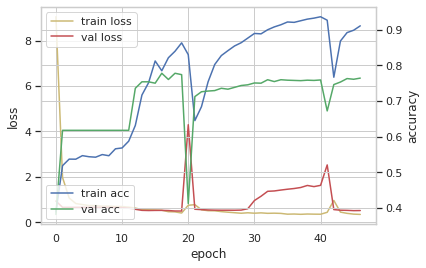

In [147]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

_=loss_ax.plot(history.history['loss'], 'y', label='train loss')
_=loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

_=acc_ax.plot(history.history['acc'], 'b', label='train acc')
_=acc_ax.plot(history.history['val_acc'], 'g', label='val acc')

_=loss_ax.set_xlabel('epoch')
_=loss_ax.set_ylabel('loss')
_=acc_ax.set_ylabel('accuracy')

_=loss_ax.legend(loc='upper left')
_=acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
# pa_list = [30, 50, 80, 100, 150]
pa_list = [200, 400, 600]
정확도_list = []

seed_num = 42
import random
random.seed(seed_num) # data shuffle할 때의 random seed 

x = np.load('/project/LSH/x_(7727,10,4069).npy')
y = np.load('/project/LSH/y_(7727,1).npy')

idx = list(range(len(x)))
random.shuffle(idx)

i = round(x.shape[0]*0.8)
X_train, y_train = x[idx[:i],:,:], y[idx[:i]]
X_test, y_test = x[idx[i:],:,:], y[idx[i:]]


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import InputLayer
import tensorflow as tf
from tqdm import tqdm
from sklearn import metrics 

def lstm2(pa, seed_num):
    
    tf.random.set_seed(seed_num) # 초기 weight를 어떻게 줄 것인가 

    lstm = Sequential()
    lstm.add(InputLayer(input_shape=(X_train.shape[1],X_train.shape[2])))
    lstm.add(LSTM(units=128, activation='sigmoid', return_sequences=True))
    lstm.add(LSTM(units=64, activation='sigmoid', return_sequences=True))
    lstm.add(Dropout(0.2))
    lstm.add(LSTM(units=64, activation='sigmoid', return_sequences=True))
    lstm.add(LSTM(units=32, activation='sigmoid', return_sequences=False))
    lstm.add(Dropout(0.2))
    lstm.add(Dense(units=1))
#     lstm.summary()

    import sklearn.metrics
    from keras.callbacks import EarlyStopping

    # -------- 수정할 부분 ---------
    ep = 1000
#     pa = 30
    # -----------------------------

    early_stop = EarlyStopping(monitor='val_acc', patience=pa, verbose=1, restore_best_weights=True)
    lstm.compile(optimizer= "adam", loss = "binary_crossentropy", metrics=['acc'])
    history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=ep,  callbacks=[early_stop], shuffle=False)

    preds = lstm.predict(X_test)

    preds[preds>0.5]=1
    preds[preds<=0.5]=0

#     from sklearn import metrics 
    print('정확도 :', metrics.accuracy_score(y_test, preds))
    return metrics.accuracy_score(y_test, preds)


for i in tqdm(pa_list):
    pred = lstm2(i, seed_num)
    정확도_list.append(pred)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/1000
37/37 [==============================] - 6s 69ms/step - loss: 1.3006 - acc: 0.5089 - val_loss: 0.6670 - val_acc: 0.6177
Epoch 2/1000
37/37 [==============================] - 2s 45ms/step - loss: 0.9530 - acc: 0.5512 - val_loss: 0.6719 - val_acc: 0.6177
Epoch 3/1000
37/37 [==============================] - 2s 45ms/step - loss: 0.7605 - acc: 0.5361 - val_loss: 0.6616 - val_acc: 0.6177
Epoch 4/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.7046 - acc: 0.5623 - val_loss: 0.6517 - val_acc: 0.6177
Epoch 5/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.6935 - acc: 0.5996 - val_loss: 0.6171 - val_acc: 0.6177
Epoch 6/1000
37/37 [==============================] - 2s 45ms/step - loss: 0.6489 - acc: 0.6197 - val_loss: 0.5613 - val_acc: 0.7549
Epoch 7/1000
37/37 [==============================] - 2s 45ms/step - loss: 0.5793 - acc: 0.7240 - val_loss: 0.5058 - val_acc: 0.7730
Epoch 8/1000
37/37 [==============================] - 2s 45ms/step - 

37/37 [==============================] - 2s 46ms/step - loss: 0.2390 - acc: 0.9541 - val_loss: 1.9410 - val_acc: 0.7329
Epoch 63/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.2046 - acc: 0.9624 - val_loss: 1.9908 - val_acc: 0.7354
Epoch 64/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.2040 - acc: 0.9653 - val_loss: 2.0153 - val_acc: 0.7406
Epoch 65/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.2245 - acc: 0.9659 - val_loss: 2.2085 - val_acc: 0.7354
Epoch 66/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1954 - acc: 0.9679 - val_loss: 1.8724 - val_acc: 0.7322
Epoch 67/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1645 - acc: 0.9689 - val_loss: 2.0977 - val_acc: 0.7419
Epoch 68/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.2672 - acc: 0.9398 - val_loss: 1.7006 - val_acc: 0.7122
Epoch 69/1000
37/37 [==============================] - 2s 46ms/step - loss: 

37/37 [==============================] - 2s 46ms/step - loss: 0.4973 - acc: 0.9433 - val_loss: 5.9896 - val_acc: 0.4955
Epoch 124/1000
37/37 [==============================] - 2s 46ms/step - loss: 2.0385 - acc: 0.6215 - val_loss: 0.8840 - val_acc: 0.6701
Epoch 125/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.4673 - acc: 0.8406 - val_loss: 1.3073 - val_acc: 0.6805
Epoch 126/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.4325 - acc: 0.8658 - val_loss: 1.3768 - val_acc: 0.6843
Epoch 127/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.3850 - acc: 0.8710 - val_loss: 1.3811 - val_acc: 0.6779
Epoch 128/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.3470 - acc: 0.8927 - val_loss: 1.5615 - val_acc: 0.6876
Epoch 129/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.3214 - acc: 0.9008 - val_loss: 0.8789 - val_acc: 0.6734
Epoch 130/1000
37/37 [==============================] - 2s 46ms/step -

Epoch 184/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1052 - acc: 0.9834 - val_loss: 3.1274 - val_acc: 0.7380
Epoch 185/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1023 - acc: 0.9824 - val_loss: 3.1554 - val_acc: 0.7380
Epoch 186/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1041 - acc: 0.9824 - val_loss: 3.1925 - val_acc: 0.7400
Epoch 187/1000
37/37 [==============================] - 2s 45ms/step - loss: 0.1095 - acc: 0.9840 - val_loss: 3.2053 - val_acc: 0.7393
Epoch 188/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1054 - acc: 0.9829 - val_loss: 3.1643 - val_acc: 0.7367
Epoch 189/1000
37/37 [==============================] - 2s 47ms/step - loss: 0.1198 - acc: 0.9822 - val_loss: 3.1913 - val_acc: 0.7374
Epoch 190/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1411 - acc: 0.9791 - val_loss: 2.8671 - val_acc: 0.7102
Epoch 191/1000
37/37 [==============================] -

 33%|███▎      | 1/3 [06:05<12:11, 365.70s/it]

정확도 : 0.7631067961165049
Epoch 1/1000
37/37 [==============================] - 6s 70ms/step - loss: 1.3006 - acc: 0.5089 - val_loss: 0.6670 - val_acc: 0.6177
Epoch 2/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.9530 - acc: 0.5512 - val_loss: 0.6719 - val_acc: 0.6177
Epoch 3/1000
37/37 [==============================] - 2s 45ms/step - loss: 0.7605 - acc: 0.5361 - val_loss: 0.6616 - val_acc: 0.6177
Epoch 4/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.7046 - acc: 0.5623 - val_loss: 0.6517 - val_acc: 0.6177
Epoch 5/1000
37/37 [==============================] - 2s 45ms/step - loss: 0.6935 - acc: 0.5996 - val_loss: 0.6171 - val_acc: 0.6177
Epoch 6/1000
37/37 [==============================] - 2s 45ms/step - loss: 0.6489 - acc: 0.6197 - val_loss: 0.5613 - val_acc: 0.7549
Epoch 7/1000
37/37 [==============================] - 2s 45ms/step - loss: 0.5793 - acc: 0.7240 - val_loss: 0.5058 - val_acc: 0.7730
Epoch 8/1000
37/37 [========================

37/37 [==============================] - 2s 46ms/step - loss: 0.2390 - acc: 0.9541 - val_loss: 1.9410 - val_acc: 0.7329
Epoch 63/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.2046 - acc: 0.9624 - val_loss: 1.9908 - val_acc: 0.7354
Epoch 64/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.2040 - acc: 0.9653 - val_loss: 2.0153 - val_acc: 0.7406
Epoch 65/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.2245 - acc: 0.9659 - val_loss: 2.2085 - val_acc: 0.7354
Epoch 66/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1954 - acc: 0.9679 - val_loss: 1.8724 - val_acc: 0.7322
Epoch 67/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1645 - acc: 0.9689 - val_loss: 2.0977 - val_acc: 0.7419
Epoch 68/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.2672 - acc: 0.9398 - val_loss: 1.7006 - val_acc: 0.7122
Epoch 69/1000
37/37 [==============================] - 2s 46ms/step - loss: 

37/37 [==============================] - 2s 46ms/step - loss: 0.4973 - acc: 0.9433 - val_loss: 5.9896 - val_acc: 0.4955
Epoch 124/1000
37/37 [==============================] - 2s 46ms/step - loss: 2.0385 - acc: 0.6215 - val_loss: 0.8840 - val_acc: 0.6701
Epoch 125/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.4673 - acc: 0.8406 - val_loss: 1.3073 - val_acc: 0.6805
Epoch 126/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.4325 - acc: 0.8658 - val_loss: 1.3768 - val_acc: 0.6843
Epoch 127/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.3850 - acc: 0.8710 - val_loss: 1.3811 - val_acc: 0.6779
Epoch 128/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.3470 - acc: 0.8927 - val_loss: 1.5615 - val_acc: 0.6876
Epoch 129/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.3214 - acc: 0.9008 - val_loss: 0.8789 - val_acc: 0.6734
Epoch 130/1000
37/37 [==============================] - 2s 46ms/step -

Epoch 184/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1052 - acc: 0.9834 - val_loss: 3.1274 - val_acc: 0.7380
Epoch 185/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1023 - acc: 0.9824 - val_loss: 3.1554 - val_acc: 0.7380
Epoch 186/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1041 - acc: 0.9824 - val_loss: 3.1925 - val_acc: 0.7400
Epoch 187/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1095 - acc: 0.9840 - val_loss: 3.2053 - val_acc: 0.7393
Epoch 188/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1054 - acc: 0.9829 - val_loss: 3.1643 - val_acc: 0.7367
Epoch 189/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1198 - acc: 0.9822 - val_loss: 3.1913 - val_acc: 0.7374
Epoch 190/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1411 - acc: 0.9791 - val_loss: 2.8671 - val_acc: 0.7102
Epoch 191/1000
37/37 [==============================] -

Epoch 245/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.0906 - acc: 0.9885 - val_loss: 3.4542 - val_acc: 0.7335
Epoch 246/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.0921 - acc: 0.9883 - val_loss: 3.4535 - val_acc: 0.7329
Epoch 247/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.0890 - acc: 0.9894 - val_loss: 3.5011 - val_acc: 0.7348
Epoch 248/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.0886 - acc: 0.9900 - val_loss: 3.5242 - val_acc: 0.7380
Epoch 249/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.0953 - acc: 0.9904 - val_loss: 3.5266 - val_acc: 0.7361
Epoch 250/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.0888 - acc: 0.9903 - val_loss: 3.4641 - val_acc: 0.7322
Epoch 251/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.0892 - acc: 0.9881 - val_loss: 3.5311 - val_acc: 0.7342
Epoch 252/1000
37/37 [==============================] -

Epoch 306/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.0963 - acc: 0.9898 - val_loss: 3.6391 - val_acc: 0.7296
Epoch 307/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.0837 - acc: 0.9924 - val_loss: 3.6306 - val_acc: 0.7264
Epoch 308/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.0812 - acc: 0.9936 - val_loss: 3.6603 - val_acc: 0.7283
Epoch 309/1000
37/37 [==============================] - 2s 47ms/step - loss: 0.0811 - acc: 0.9932 - val_loss: 3.6764 - val_acc: 0.7290
Epoch 310/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.0847 - acc: 0.9917 - val_loss: 3.7016 - val_acc: 0.7335
Epoch 311/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.0831 - acc: 0.9920 - val_loss: 3.6627 - val_acc: 0.7277
Epoch 312/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.0803 - acc: 0.9928 - val_loss: 3.6742 - val_acc: 0.7277
Epoch 313/1000
37/37 [==============================] -

37/37 [==============================] - 2s 46ms/step - loss: 0.0765 - acc: 0.9950 - val_loss: 3.9250 - val_acc: 0.7290
Epoch 367/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.0765 - acc: 0.9950 - val_loss: 3.9388 - val_acc: 0.7290
Epoch 368/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.0773 - acc: 0.9946 - val_loss: 3.9446 - val_acc: 0.7329
Epoch 369/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.0768 - acc: 0.9950 - val_loss: 3.9511 - val_acc: 0.7296
Epoch 370/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.0827 - acc: 0.9943 - val_loss: 3.9917 - val_acc: 0.7277
Epoch 371/1000
37/37 [==============================] - 2s 47ms/step - loss: 0.0770 - acc: 0.9950 - val_loss: 3.9439 - val_acc: 0.7264
Epoch 372/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.0767 - acc: 0.9950 - val_loss: 3.9365 - val_acc: 0.7257
Epoch 373/1000
37/37 [==============================] - 2s 46ms/step -

 67%|██████▋   | 2/3 [17:54<09:27, 567.73s/it]

정확도 : 0.7631067961165049
Epoch 1/1000
37/37 [==============================] - 6s 71ms/step - loss: 1.3006 - acc: 0.5089 - val_loss: 0.6670 - val_acc: 0.6177
Epoch 2/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.9530 - acc: 0.5512 - val_loss: 0.6719 - val_acc: 0.6177
Epoch 3/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.7605 - acc: 0.5361 - val_loss: 0.6616 - val_acc: 0.6177
Epoch 4/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.7046 - acc: 0.5623 - val_loss: 0.6517 - val_acc: 0.6177
Epoch 5/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.6935 - acc: 0.5996 - val_loss: 0.6171 - val_acc: 0.6177
Epoch 6/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.6489 - acc: 0.6197 - val_loss: 0.5613 - val_acc: 0.7549
Epoch 7/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.5793 - acc: 0.7240 - val_loss: 0.5058 - val_acc: 0.7730
Epoch 8/1000
37/37 [========================

37/37 [==============================] - 2s 46ms/step - loss: 0.2390 - acc: 0.9541 - val_loss: 1.9410 - val_acc: 0.7329
Epoch 63/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.2046 - acc: 0.9624 - val_loss: 1.9908 - val_acc: 0.7354
Epoch 64/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.2040 - acc: 0.9653 - val_loss: 2.0153 - val_acc: 0.7406
Epoch 65/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.2245 - acc: 0.9659 - val_loss: 2.2085 - val_acc: 0.7354
Epoch 66/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1954 - acc: 0.9679 - val_loss: 1.8724 - val_acc: 0.7322
Epoch 67/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.1645 - acc: 0.9689 - val_loss: 2.0977 - val_acc: 0.7419
Epoch 68/1000
37/37 [==============================] - 2s 46ms/step - loss: 0.2672 - acc: 0.9398 - val_loss: 1.7006 - val_acc: 0.7122
Epoch 69/1000
37/37 [==============================] - 2s 46ms/step - loss: 

In [ ]:
정확도_list

## LSTM 2

In [85]:
x = np.load('/project/LSH/x_(7727,10,4069).npy')
y = np.load('/project/LSH/y_(7727,1).npy')

i = round(x.shape[0]*0.8)
X_train, y_train = x[:i,:,:], y[:i]
X_test, y_test = x[i:,:,:], y[i:]

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *

lstm2 = Sequential()
lstm2.add(InputLayer(input_shape=(X_train.shape[1],X_train.shape[2])))
lstm2.add(LSTM(units=512, activation='tanh', return_sequences=True))
lstm2.add(LSTM(units=256, activation='tanh', return_sequences=True))
lstm2.add(LSTM(units=128, activation='tanh', return_sequences=True))
lstm2.add(LSTM(units=64, activation='sigmoid', return_sequences=True))
lstm2.add(LSTM(units=32, activation='sigmoid', return_sequences=False))
lstm2.add(Dense(units=1))
# lstm2.summary()


import sklearn.metrics 
from keras.callbacks import EarlyStopping

# -------- 수정할 부분 ---------
ep = 500
pa = 30
# -----------------------------

early_stop = EarlyStopping(monitor='val_acc', patience=pa, verbose=1, restore_best_weights=True)
lstm2.compile(optimizer= "adam", loss = "binary_crossentropy", metrics=['acc'])
history = lstm2.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=ep,  callbacks=[early_stop], shuffle=False)

preds = lstm2.predict(X_test)

preds[preds>0.5]=1
preds[preds<=0.5]=0

from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, preds))

Epoch 1/500
37/37 [==============================] - 12s 212ms/step - loss: 10.6661 - acc: 0.3085 - val_loss: 7.6426 - val_acc: 0.5045
Epoch 2/500
37/37 [==============================] - 7s 184ms/step - loss: 10.6661 - acc: 0.3085 - val_loss: 7.6426 - val_acc: 0.5045
Epoch 3/500
37/37 [==============================] - 7s 185ms/step - loss: 10.6661 - acc: 0.3085 - val_loss: 7.6426 - val_acc: 0.5045
Epoch 4/500
37/37 [==============================] - 7s 185ms/step - loss: 10.6661 - acc: 0.3085 - val_loss: 7.6426 - val_acc: 0.5045
Epoch 5/500
37/37 [==============================] - 7s 185ms/step - loss: 10.6661 - acc: 0.3085 - val_loss: 7.6426 - val_acc: 0.5045
Epoch 6/500
37/37 [==============================] - 7s 186ms/step - loss: 10.6661 - acc: 0.3085 - val_loss: 7.6426 - val_acc: 0.5045
Epoch 7/500
37/37 [==============================] - 7s 186ms/step - loss: 10.6661 - acc: 0.3085 - val_loss: 7.6426 - val_acc: 0.5045
Epoch 8/500
37/37 [==============================] - 7s 184ms

## LSTM 3 (guri)

In [143]:
import random
seed_num = 42
random.seed(seed_num)

x = np.load('/project/LSH/x_(7727,10,4069).npy')
y = np.load('/project/LSH/y_(7727,1).npy')

idx = list(range(len(x)))
random.shuffle(idx)

i = round(x.shape[0]*0.8)
X_train, y_train = x[idx[:i],:,:], y[idx[:i]]
X_test, y_test = x[idx[i:],:,:], y[idx[i:]]

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *

seed_num = 42 
tf.random.set_seed(seed_num)

lstm2 = Sequential()
lstm2.add(InputLayer(input_shape=(X_train.shape[1],X_train.shape[2])))
lstm2.add(LSTM(units=128, activation='relu', return_sequences=True))
lstm2.add(LSTM(units=64, activation='relu', return_sequences=True))
lstm2.add(LSTM(units=32, activation='tanh', return_sequences=False))
lstm2.add(Dense(units=1))
# lstm2.summary()


from keras.callbacks import EarlyStopping

# -------- 수정할 부분 ---------
ep = 30
pa = 100
# -----------------------------

early_stop = EarlyStopping(monitor='val_acc', patience=pa, verbose=1, restore_best_weights=True)
lstm2.compile(optimizer= "adam", loss = "binary_crossentropy", metrics=['acc'])
history = lstm2.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=ep,  callbacks=[early_stop], shuffle=False)

preds = lstm2.predict(X_test)

preds[preds>0.5]=1
preds[preds<=0.5]=0

import sklearn.metrics 
from sklearn.metrics import accuracy_score

print('정확도 :', metrics.accuracy_score(y_test, preds))

Epoch 1/30
37/37 [==============================] - 5s 59ms/step - loss: 1.3046 - acc: 0.5013 - val_loss: 0.6364 - val_acc: 0.6171
Epoch 2/30
37/37 [==============================] - 1s 39ms/step - loss: 0.6095 - acc: 0.6787 - val_loss: 0.5935 - val_acc: 0.7083
Epoch 3/30
37/37 [==============================] - 1s 40ms/step - loss: 0.5697 - acc: 0.7235 - val_loss: 0.7068 - val_acc: 0.7445
Epoch 4/30
37/37 [==============================] - 1s 40ms/step - loss: 0.4877 - acc: 0.8145 - val_loss: 1.1898 - val_acc: 0.7484
Epoch 5/30
37/37 [==============================] - 1s 40ms/step - loss: 0.4274 - acc: 0.8522 - val_loss: 1.2030 - val_acc: 0.7432
Epoch 6/30
37/37 [==============================] - 1s 40ms/step - loss: 0.3806 - acc: 0.8860 - val_loss: 1.6623 - val_acc: 0.7387
Epoch 7/30
37/37 [==============================] - 1s 40ms/step - loss: 0.3301 - acc: 0.9075 - val_loss: 2.2775 - val_acc: 0.7167
Epoch 8/30
37/37 [==============================] - 1s 40ms/step - loss: 0.4236 - a